# Random Forest Classifier

- Random Forest is an ensemble learning technique.
- Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.
- Then it gets predictions from each tree and by means of majority voting, it selects the decision which gets the majority vote.

![Alt Text](https://d2jdgazzki9vjm.cloudfront.net/tutorial/machine-learning/images/random-forest-algorithm.png)

## How does Random Forest algorithm work?
The steps for Random Forest Algorithms are as follows-
- STEP 1: Pick at random K data points from the Training set.
- STEP 2: Build the Decision Tree associated with these K data points.
- STEP 3: Choose the number Ntree of trees you want to build and repeat STEPS 1 & 2
- STEP 4: For a new data point, make each one of your Ntree trees predict the category to which the data points belongs, and assign the new data point to the category that wins the majority vote.

## Applications of Random Forest
- Banking: Banking sector mostly uses this algorithm for the identification of loan risk.
- Medicine: With the help of this algorithm, disease trends and risks of the disease can be identified.
- Land Use: We can identify the areas of similar land use by this algorithm.
- Marketing: Marketing trends can be identified using this algorithm.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [32]:
# Load Dataset
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Exploratory Data Analysis (EDA)

In [33]:
# Check for missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [34]:
# Summary Statistics
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


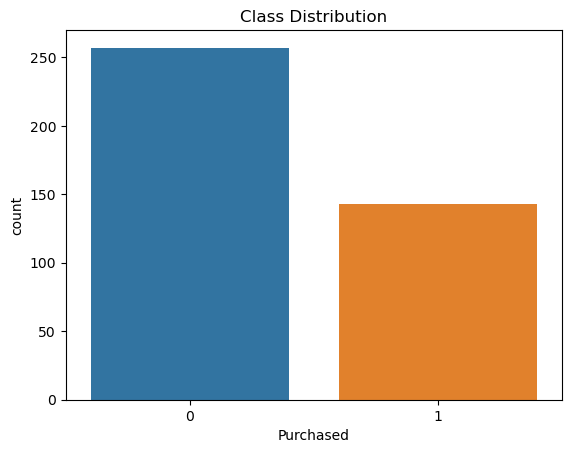

In [35]:
# Check class distribution
sns.countplot(x=df['Purchased'])
plt.title("Class Distribution")
plt.show()

In [36]:
X = df.iloc[:, 2:4]. values #Independent Variable
y = df.iloc[:, -1].values # Dependent Variable (Target Variable)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [40]:
# Predict on Test data
y_pred = classifier.predict(x_test)
print("Predictions:", y_pred)

Predictions: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [41]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.95


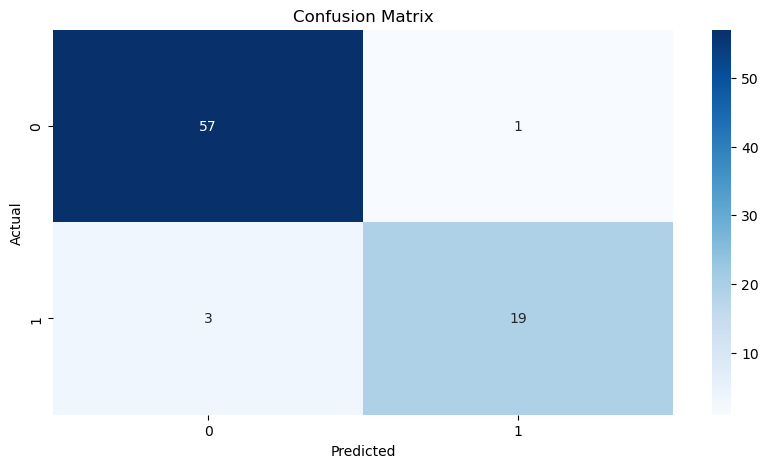

In [42]:
# Confusion Matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()